In [14]:
# Import librarries

import sklearn
from sklearn import metrics
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import random

In [5]:
data1 = np.array([[random.randint(1, 400) for i in range(2)] for j in range(50)], dtype=np.float64)
data2 = np.array([[random.randint(300, 700) for i in range(2)] for j in range(50)], dtype=np.float64)
data3 = np.array([[random.randint(600, 900) for i in range(2)] for j in range(50)], dtype=np.float64)

data = np.append(np.append(data1, data2, axis=0), data3, axis=0)

In [7]:
data.shape

(150, 2)

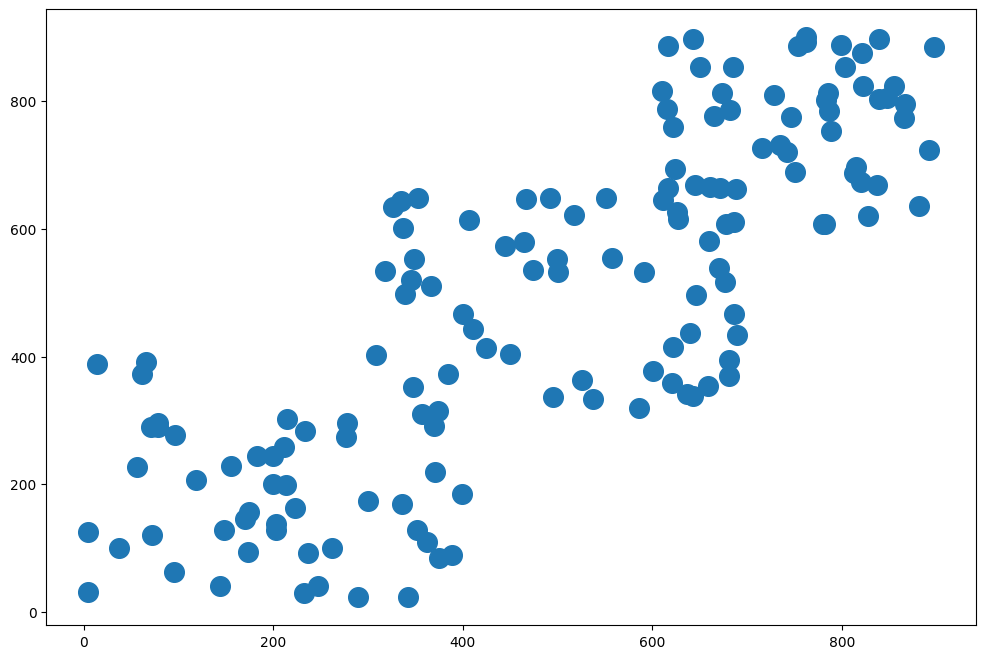

In [8]:
fix, ax = plt.subplots(figsize = (12, 8))

plt.scatter(data[:,0], data[:,1], s=200)

In [10]:
labels1 = np.array([0 for i in range(50)])
labels2 = np.array([1 for i in range(50)])
labels3 = np.array([2 for i in range(50)])
labels = np.append(np.append(labels1, labels2, axis = 0), labels3, axis=0)

In [11]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
df = pd.DataFrame({'data_x': data[:,0], 'data_y': data[:,1], 'labels': labels})
df.head()

,data_x,data_y,labels
0,148.0,129.0,0
1,72.0,121.0,0
2,215.0,302.0,0
3,371.0,219.0,0
4,200.0,245.0,0


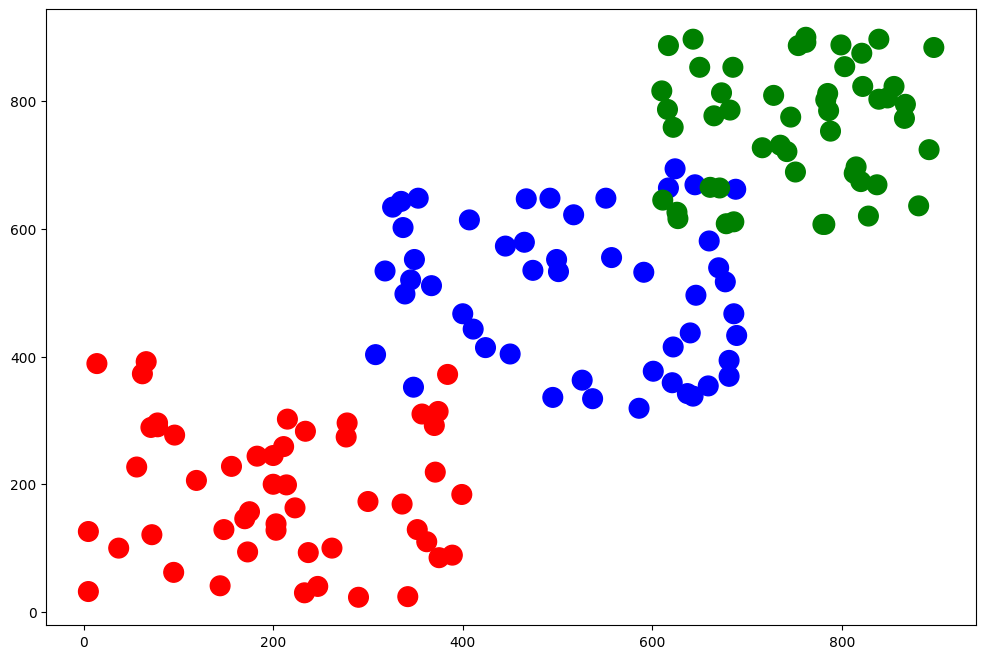

In [15]:
colors = ['red', 'blue', 'green']

plt.figure(figsize=(12,8))
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors))

In [16]:
kmeans_model = KMeans(n_clusters=3, max_iter=10000).fit(data)

kmeans_model.labels_

/home/gauravjain/projects/sci-kit/scilib/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [17]:
centroids = kmeans_model.cluster_centers_

centroids

array([[743.31481481, 755.11111111],
       [201.72916667, 182.83333333],
       [501.89583333, 481.64583333]])

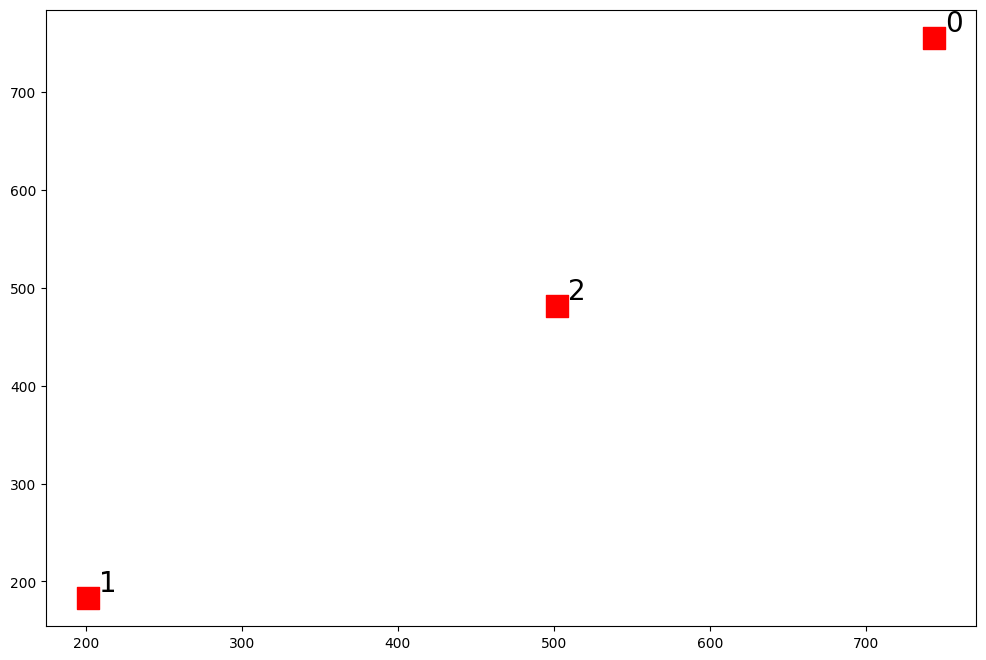

In [18]:
fix, ax = plt.subplots(figsize = (12, 8))

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=20)

In [20]:
print('Homogeneity_score: ', metrics.homogeneity_score(labels, kmeans_model.labels_))

print('Completeness_score: ', metrics.completeness_score(labels, kmeans_model.labels_))

print('v_measure_score: ', metrics.v_measure_score(labels, kmeans_model.labels_))

print('Adjusted_rand_score: ', metrics.adjusted_rand_score(labels, kmeans_model.labels_))

print('Adjusted_mutual_info_score: ', metrics.adjusted_mutual_info_score(labels, kmeans_model.labels_))

print('Silhouette_score: ', metrics.silhouette_score(data, kmeans_model.labels_))

Homogeneity_score:  0.8630231917400075
Completeness_score:  0.8642660801900913
v_measure_score:  0.8636441887985775
Adjusted_rand_score:  0.8841400085914858
Adjusted_mutual_info_score:  0.8619363608060562
Silhouette_score:  0.4986253927332109


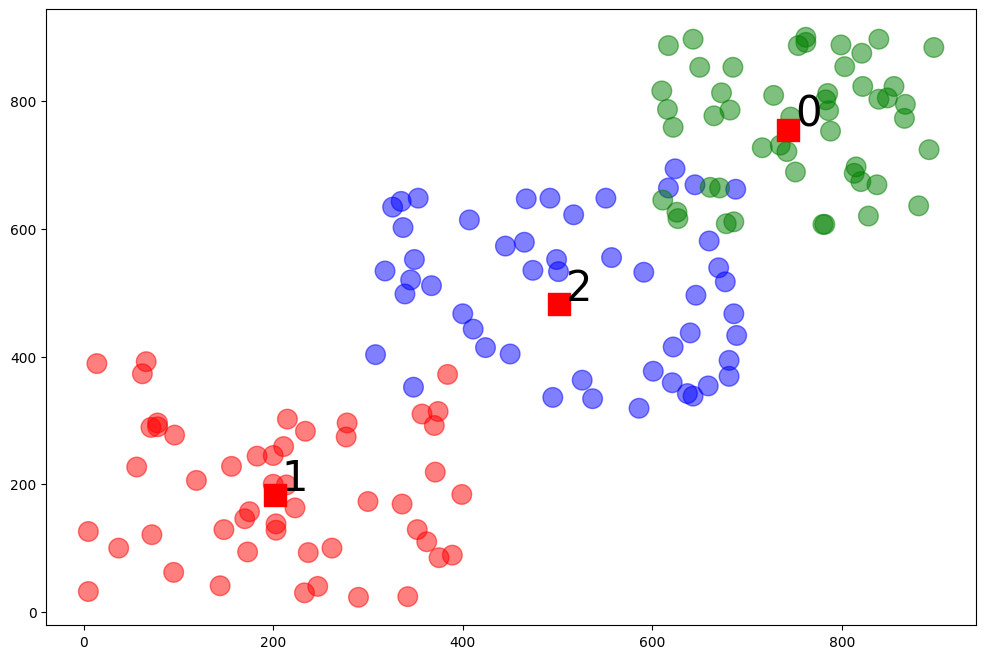

In [21]:
colors = ['red', 'blue', 'green']

plt.figure(figsize=(12,8))
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)

In [23]:
data_test = np.array([[442., 621.],
                     [50., 153.],
                     [333., 373.],
                     [835., 816.]])

In [24]:
label_pred = kmeans_model.predict(data_test)

label_pred

array([2, 1, 2, 0], dtype=int32)

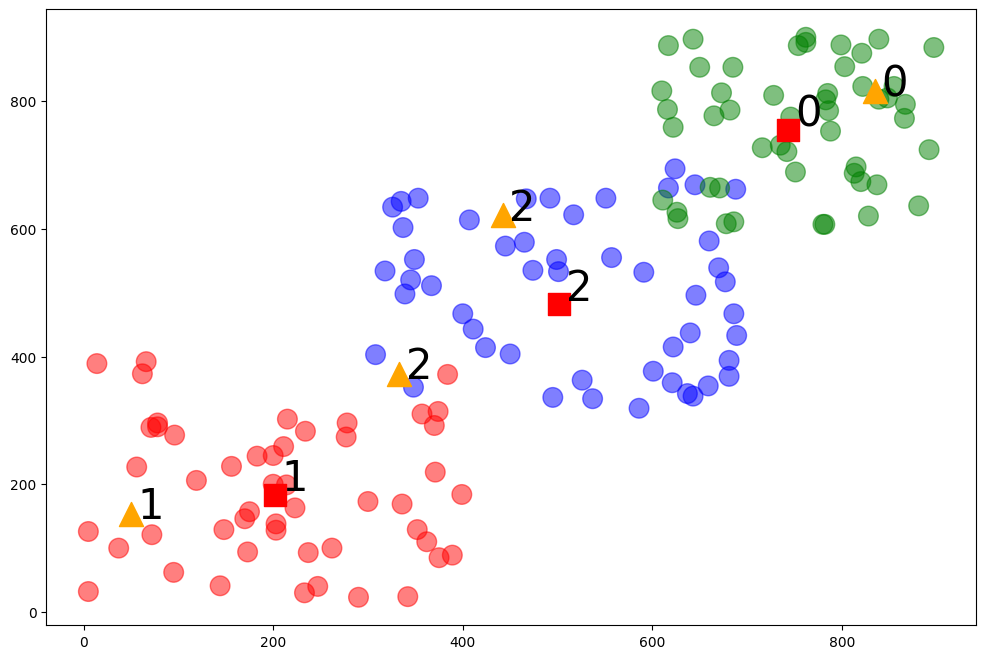

In [25]:
colors = ['red', 'blue', 'green']

plt.figure(figsize=(12,8))
plt.scatter(df['data_x'], df['data_y'], c=df['labels'], s=200, cmap=matplotlib.colors.ListedColormap(colors), alpha=0.5)

plt.scatter(data_test[:,0], data_test[:,1], c='orange', s=300, marker='^')
for i in range(len(label_pred)):
    plt.annotate(label_pred[i], (data_test[i][0] + 7, data_test[i][1] - 7), fontsize=30)

plt.scatter(centroids[:,0], centroids[:,1], c='r', s=250, marker='s')

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0] + 7, centroids[i][1] + 7), fontsize=30)